In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow import keras

In [2]:
df = pd.read_excel('aug_nine_var.xlsx')

In [3]:
X = df.iloc[:,1:22]
y = df.iloc[:,22:23].to_numpy()

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [6]:
#비선형
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=3, kernel="rbf", gamma=0.1, fit_inverse_transform=True)
# x_train_kpca = kpca.fit_transform(x_train)
# x_valid_kpca = kpca.transform(x_valid)



#선형

pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
temp = x_train_pca
x_valid_pca = pca.transform(x_valid)
print(x_train_pca.shape, x_valid_pca.shape, y_train.shape, y_valid.shape)

#save x_train_pca as dataframe
# x_train_pca_df = pd.DataFrame(x_train_pca)
# x_train_pca_df.to_excel('x_train_pca_df.xlsx')



(316, 3) (79, 3) (316, 1) (79, 1)


In [7]:
#x_train 기존 값
#x_reduced: 치원 축소 된 것
#x_restored: 치원 축소 복원한 것

model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(3,))),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(32, activation='relu')),
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(20, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(x_train_pca, y_train, epochs=100, validation_data=(x_valid_pca, y_valid))

# model = tf.keras.Sequential()
# model.add(layers.Dense(256, activation='relu', input_dim=3))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(21, activation='linear'))
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# model.fit(x_train_pca, y_train, epochs=10000, batch_size=10, validation_data=(x_valid, y_valid), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100
#                                                                                                                                               )])

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 1757.3186 - mse: 1757.3186 - val_loss: 1699.3409 - val_mse: 1699.3409
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1743.0536 - mse: 1743.0536 - val_loss: 1668.5701 - val_mse: 1668.5701
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1687.1211 - mse: 1687.1211 - val_loss: 1554.5847 - val_mse: 1554.5847
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1504.0864 - mse: 1504.0864 - val_loss: 1252.4800 - val_mse: 1252.4800
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 1165.4056 - mse: 1165.4056 - val_loss: 1029.2008 - val_mse: 1029.2008
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 969.4514 - mse: 969.4514 - val_loss: 838.5324 - val_mse: 838.5324
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 805.2209 - mse: 805.2209 - val_loss: 714.0808 - val_mse: 714.0808
Epoch 

In [10]:
x_train_pca = scaler.fit_transform(x_train_pca)
x_train_pca = x_train_pca.T
list = [0, 0, 0]
print(x_train_pca.shape)
for i in range(3):
    for j in range(316):
        list[i] = list[i] + x_train_pca[i][j]
    list[i] = list[i] / 316
    print(list[i])

(316, 3)
0.4428025720311986
0.39118971109535383
0.43444578193647926


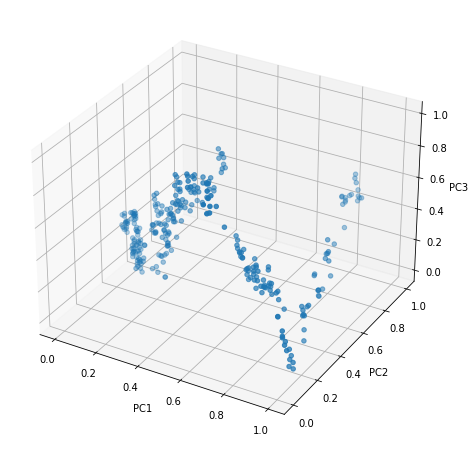

In [11]:
#plot 3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temp[0], temp[1], temp[2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [14]:
x_train_pca = temp

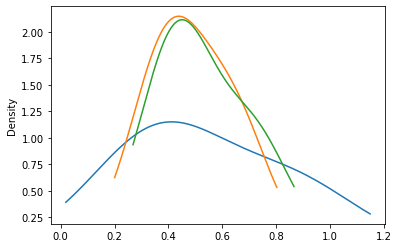

In [21]:
x_train_pca_df = pd.DataFrame(x_train_pca)
# x_train_pca_df = x_train_pca_df.astype(float)
x1 = x_train_pca_df.iloc[:,0]
x2 = x_train_pca_df.iloc[:,1]
x3 = x_train_pca_df.iloc[:,2]

x1.plot.density()
x2.plot.density()
x3.plot.density()
plt.show()
#print density 
# print(x1.density())
# print(x2.density())
# print(x3.density())
# plt.show()


In [22]:
x_train_pca_df = pd.DataFrame(x_train_pca)
# x_train_pca_df = x_train_pca_df.astype(float)
x1 = x_train_pca_df.iloc[:,0]
x2 = x_train_pca_df.iloc[:,1]
x3 = x_train_pca_df.iloc[:,2]
print(x1.ndim)
#print density 

1


NameError: name 'x_' is not defined

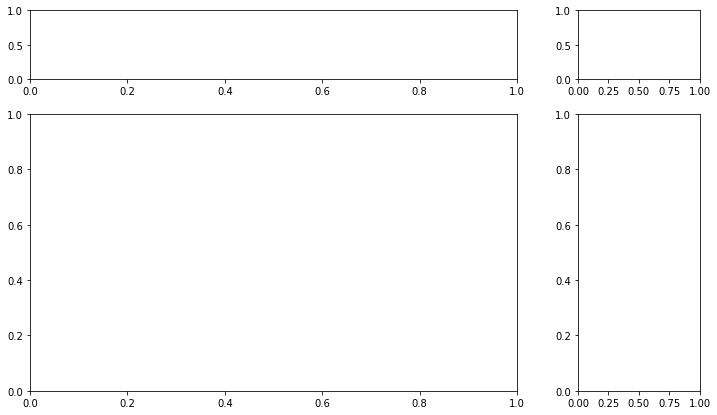

In [23]:
#sns joinplot
from matplotlib import gridspec

x1 = x_train_pca_df.iloc[:,0]
x2 = x_train_pca_df.iloc[:,1]
x3 = x_train_pca_df.iloc[:,2]
#y to one dimension
y_1d = y_train.reshape(len(y_train),)

fig = plt.figure(figsize=(12,7))

width = [4, 1]
height = [1, 4]

#gridspec preparation
gs = gridspec.GridSpec(2, 2, width_ratios=width, height_ratios=height)
#setting axes
axs = []
for i in range(len(width)* len(height)):
    axs.append(fig.add_subplot(gs[i]))
    
#kdeplot
sns.kdeplot(data = x_)


c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Per-column arrays must each be 1-dimensional

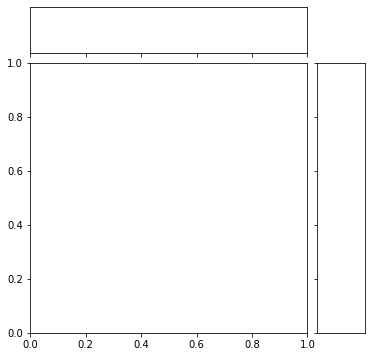

In [24]:
#sns joinplot
from turtle import bgcolor


sns.jointplot(x1, y, kind='kde', color='r', xlim=(-2,3), ylim=(35,48), bgcolor='white')
plt.show()
#delate background

sns.jointplot(x2, y, kind='kde', color='g', xlim=(-2,3), ylim=(35,48), bgcolor='white')

plt.show()
sns.jointplot(x3, y, kind='kde', color='b', xlim=(-2,3), ylim=(35,48), bgcolor='white')
plt.show()
# #merge x_train_pca and y_train
# x_train_pca_df = pd.DataFrame(x_train_pca)
# x_train_pca_df['y'] = y_train
# x_train_pca_df.head()

# # merge graph/
# fig = plt.figure(figsize=(12,7))
# gs = gridspec.GridSpec(2, 2, width_ratios=width, height_ratios=height)
# axs = []
# for i in range(len(width)* len(height)):
#     axs.append(fig.add_subplot(gs[i]))

# #kdeplot
# sns.kdeplot(data = x_train_pca_df.iloc[:,0], ax=axs[0])
# sns.kdeplot(data = x1, ax=axs[0])
# sns.kdeplot(data = x2, ax=axs[1])
# sns.kdeplot(data = x3, ax=axs[2])
# sns.kdeplot(data = y, ax=axs[3])
# plt.xlim(-2, 3)
# plt.show()



